# Stars and Intensities
## Week 13
The aim of this week was to visualize the information obtained from the `m16_nircam.fits` file, pre and post-processed by the algorithms tested in the previous weeks.

<p align="center"><img src="https://www.universetoday.com/wp-content/uploads/2013/05/18_Hertzsprung-Russell-diagram.png"></p>

> source: [Why are Stars Differnet Colors?](https://www.universetoday.com/130870/stars-different-colors/)

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.stats import norm
from matplotlib.colors import LogNorm

In [2]:
hdulist = fits.open("m16_nircam.fits")
hdulist.info()

Filename: m16_nircam.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   (738, 465)   float32   


## Cards
To demonstrate the cards that the file contains:

In [43]:
for card in cards:
    print(card.keyword, card.value, card.comment)

SIMPLE True Fits Standard
BITPIX -32 Bits per pixel
NAXIS 2 Number of axes
NAXIS1 738 Axis Length
NAXIS2 465 Axis Length
WCSAXES 2 Number of WCS axes
CRPIX1 372.759952 Reference pixel on axis 1
CRPIX2 233.605771 Reference pixel on axis 2
CRVAL1 -13.851717873180355 Value at ref. pixel on axis 1
CRVAL2 274.7299016171027 Value at ref. pixel on axis 2
CTYPE1 DEC--TAN Type of co-ordinate on axis 1
CTYPE2 RA---TAN Type of co-ordinate on axis 2
CDELT1 0.00013939685673802893 Pixel size on axis 1
CDELT2 0.00013939685673804045 Pixel size on axis 2
PC1_1 0.9989081324728165 Transformation matrix element
PC1_2 -0.04671769343268084 Transformation matrix element
PC2_1 0.046717693433260404 Transformation matrix element
PC2_2 0.9989081324727894 Transformation matrix element
MJD-OBS 59810.2984662958 Modified Julian Date of observation
DATE-OBS 2022-08-19T07:09:47.488 Date of observation
RADESYS FK5 Reference frame for RA/DEC values
EQUINOX 2000.0 [yr] Epoch of reference equinox
OBSGEO-X 982679614.938534

## Main Data
The main data from the file:

In [44]:
data = hdulist[0].data
print(f"type of data is: {type(data)}\n\ndata table is: \n\n{data}")

type of data is: <class 'numpy.ndarray'>

data table is: 

[[ 22.848537  22.808361  23.27189  ...  34.687004  35.44906   33.95135 ]
 [ 23.437601  24.697353  26.678566 ...  36.800648  34.65737   35.473812]
 [ 25.950945  38.747097  28.992113 ...  36.86807   45.93803   36.385563]
 ...
 [ 18.427212  16.41493   17.926346 ... 104.73683   42.2448    41.23892 ]
 [ 16.82903   19.123379  17.142443 ...  41.35935   41.532803  40.767445]
 [ 17.395813  15.718047  16.182487 ...  42.108433  43.185944  41.583733]]


## Image Format

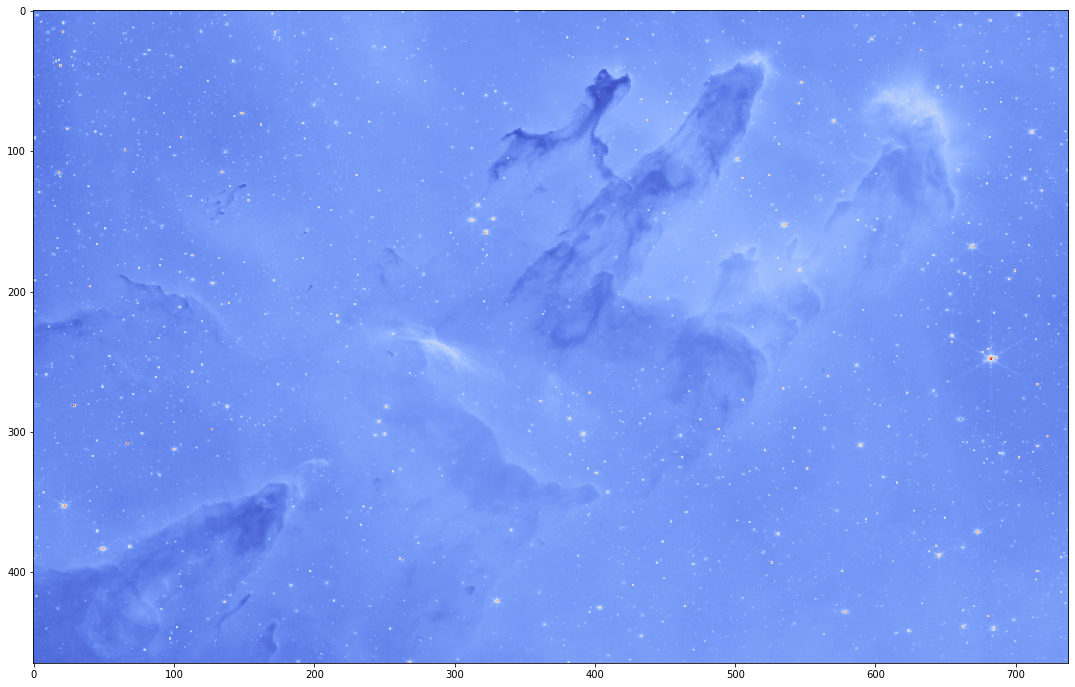

In [18]:
image_data = hdulist[0].data
plt.figure(figsize = (20, 12))
plt.imshow(image_data, cmap = 'coolwarm', norm=LogNorm())

## First Block of Data

In [46]:
print(f"the 0-th row of data is of the type: {type(data[0])}")
print(f"the length of the 0-th row of data: {len(data[0])}")
print(f"the 0-th row of data: \n{data[0]}")

the 0-th row of data is of the type: <class 'numpy.ndarray'>
the length of the 0-th row of data: 738
the 0-th row of data: 
[  22.848537   22.808361   23.27189    23.701574   26.296898   24.340803
   24.72388    25.208706   27.110695   25.993134   24.486946   25.172583
   25.017868   27.05549    27.507898   32.25377    38.952232   28.058258
   28.001371   27.992056   27.103853   29.017677   30.412529   28.35728
   28.28685    30.074923   28.977703   30.295116   29.355143   28.019423
   29.050844   28.938875   29.510544   29.99206    30.952898   30.970846
   30.59361    30.406055   30.417551   32.29018    31.26626    30.588623
   31.170033   30.850533   35.691486  101.57522    33.934124   32.183903
   32.34627    31.641184   32.452152   33.838715   32.14566    32.72787
   33.033817   32.52894    32.125195   32.22918    33.33874    32.697155
   32.00759    32.54702    31.496954   30.88859    30.251959   31.969057
   34.13931    33.014412   31.759846   31.187094   31.908537   31.201159
  

## Plotting of the First Block
The graph below represents the value (or "intensity") that each position holds in the first block of data.

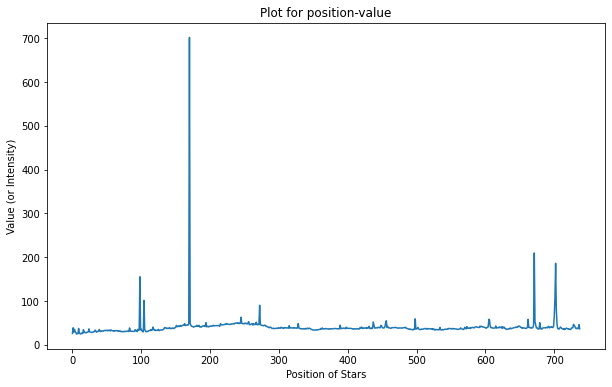

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data[2])
ax.set_title("Plot for position-value")
plt.xlabel("Position of Stars")
plt.ylabel("Value (or Intensity)")
plt.show()

## Log Scale
For the sake of better representation:

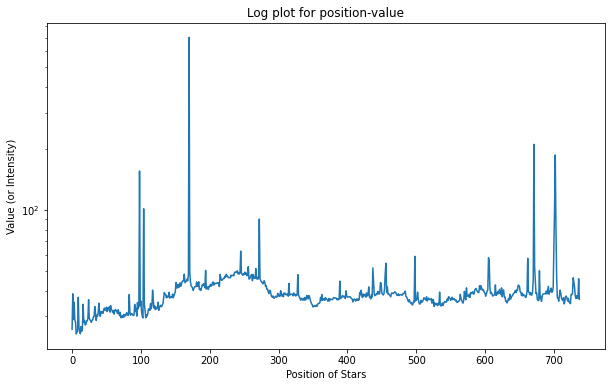

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data[2])
ax.set_title("Log plot for position-value")
plt.xlabel("Position of Stars")
plt.ylabel("Value (or Intensity)")
plt.gca().set_yscale("log")
plt.show()

## Verifying Results
To check whether the data is being graphed correctly, the maximum and minimum values were checked manually (for the first few blocks). In the case of the first block, or `data[0]`, the numbers $1004$ and $22$ were found as the max & min (respectively) of the array.

The code below also approves the manual findings, and the numbers on the graphs above.

In [12]:
min_int_0 = data[0].min()
max_int_0 = data[0].max()
mean_int_0 = data[0].mean()

print(f"the max and min of 0-th row of data: {max_int_0} & {min_int_0}")
print(f"the mean of 0-th row of data: {mean_int_0}")

the max and min of 0-th row of data: 1004.3331909179688 & 22.808361053466797
the mean of 0-th row of data: 40.815738677978516


## Min & Max on All Data
To check what the minimum and maximum values are in the whole dataset:

In [13]:
min_int_total = data.min()
max_int_total = data.max()
mean_int_total = data.min()

print(f"the max and min of the whole dataset: {max_int_total} & {min_int_total}")
print(f"the mean of the whole dataset: {mean_int_total}")

the max and min of the whole dataset: 19372.150390625 & 0.0
the mean of the whole dataset: 0.0


## Plotting All the Data
Now, the whole dataset is graphed:

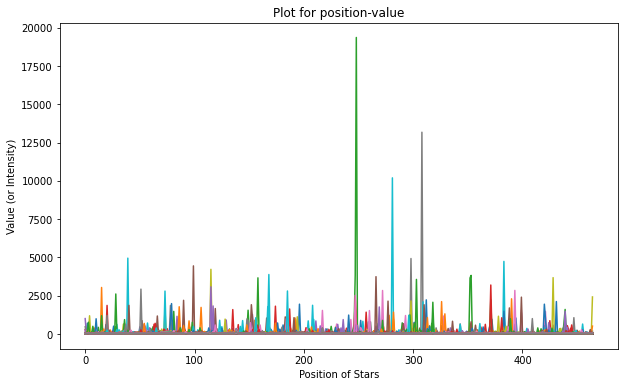

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data)
ax.set_title("Plot for position-value")
plt.xlabel("Position of Stars")
plt.ylabel("Value (or Intensity)")
plt.show()

## Log Scale
Same as before:

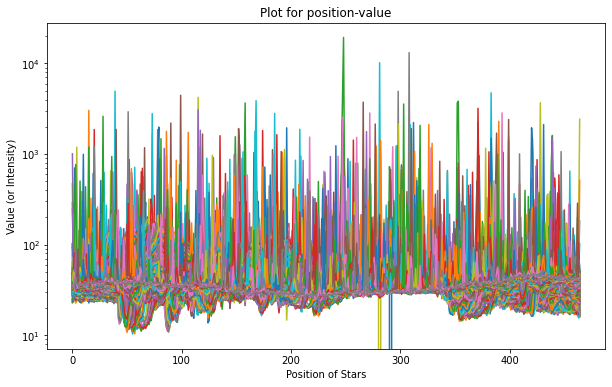

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data)
ax.set_title("Plot for position-value")
plt.xlabel("Position of Stars")
plt.ylabel("Value (or Intensity)")
plt.gca().set_yscale("log")
plt.show()

## Fixing the Anomalies
Since $$\log (0) = - \infty$$ the program shows the $y$ value of some points as $-\infty$. Therefore, to counter this issue, all values were increased by one.
$$\forall a_{i,j} \in A: a_{i,j} := a_{i,j} + 1$$
> Where $A$ denotes the dataset.

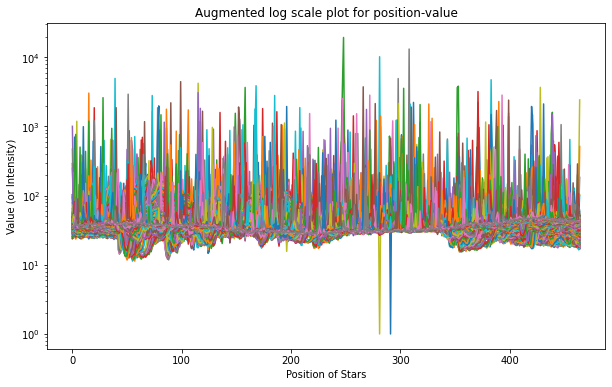

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
data_filtered = np.copy(data) + np.ones(data.shape)
ax.plot(data_filtered)
ax.set_title("Augmented log scale plot for position-value")
plt.xlabel("Position of Stars")
plt.ylabel("Value (or Intensity)")
plt.gca().set_yscale("log")
plt.show()

As one can see, the minimum data-point now corresponds to a value of $1$ in the $y$-axis.

## Testing Pie Charts
The 2 pie charts below are simply for the sake of experimenting with the data. Based on the results, a histogram seems more promising, and less confusing for representing the data. However, the slices below give a general idea of the share of values (or "intensities") based on position.

### Pie Chart for the First 30 Items

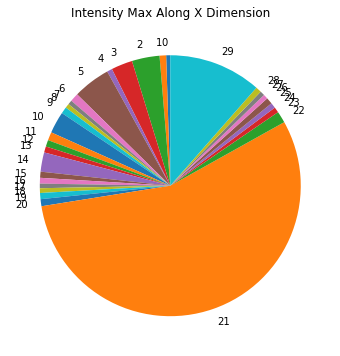

In [47]:
intensities = data[:30, :30]
intensity_max_x = np.max(intensities, axis=0)
fig, ax = plt.subplots(figsize=(10,6))

# Rotate the plot by 90 degrees
ax.pie(intensity_max_x, labels=range(intensities.shape[1]), startangle=90)

ax.set_title("Intensity Max Along X Dimension")
plt.show()

## All Data

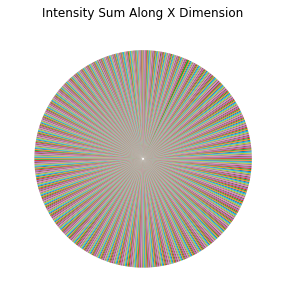

In [48]:
intensities = data

intensity_sum_x = np.sum(intensities, axis=0)
intensity_sum_y = np.sum(intensities, axis=1)

fig, ax = plt.subplots(figsize=(8,5))

ax.pie(intensity_sum_x, startangle=90)

ax.set_title("Intensity Sum Along X Dimension")

plt.show()

## Visualization After Canny Implementation
After this point, the Canny algorithm will process the data first, and then another set of plots will be drawn.

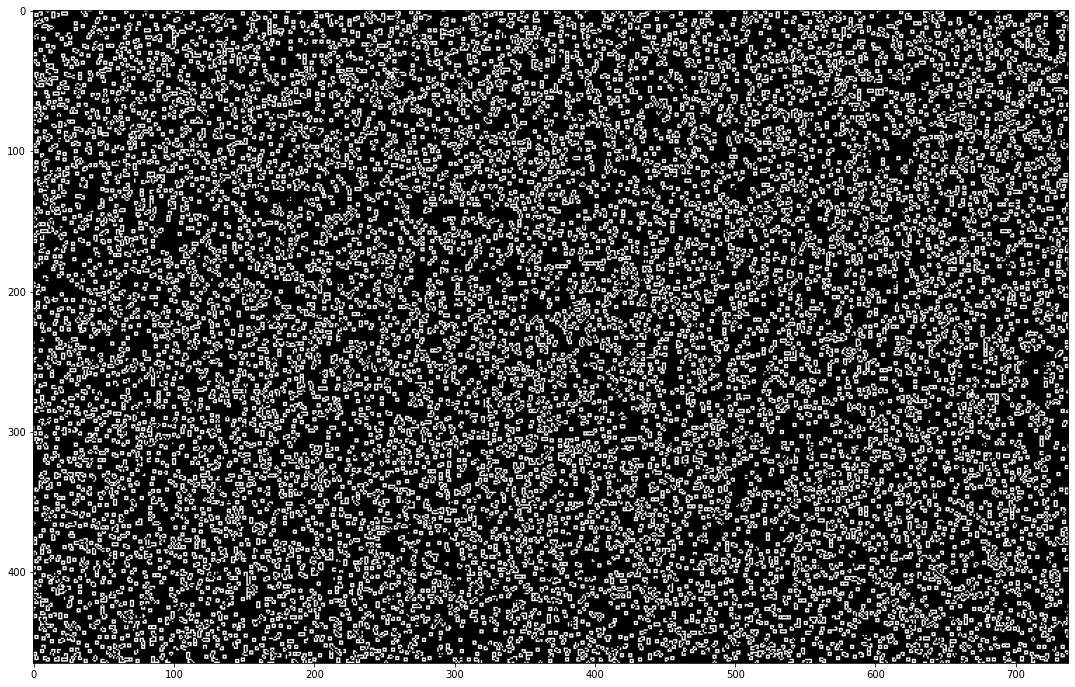

In [2]:
img = cv2.imread("prof_processed_image.jpg")
edges = cv2.Canny(img, 100, 200)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.figure(figsize = (20,12))
plt.imshow(edges, "gray")

In [3]:
results = []

for i in range(len(contours)):
    #initialize the parameters in each iteration
    max_x = float('-inf')
    min_x = float('inf')
    max_y = float('-inf')
    min_y = float('inf')
    for j in range(len(contours[i])):
        x, y = contours[i][j][0]  # Unpack the X and Y values from the tuple
        max_x = max(max_x, x)  # Update the maximum X value if necessary
        min_x = min(min_x, x)  # Update the minimum X value if necessary
        max_y = max(max_y, y)  # Update the maximum Y value if necessary
        min_y = min(min_y, y)  # Update the minimum Y value if necessary
    results.append([min_x, max_x, min_y, max_y])

# Displaying the first 10 results
for result in results[:10]:
    print(result)

[676, 677, 464, 464]
[661, 661, 464, 464]
[634, 636, 464, 464]
[551, 551, 464, 464]
[352, 352, 464, 464]
[350, 350, 464, 464]
[341, 342, 464, 464]
[167, 171, 464, 464]
[650, 652, 463, 464]
[646, 648, 463, 464]


In [4]:
hdulist = fits.open('m16_nircam.fits')
data = hdulist[0].data
y_range, x_range = data.shape
print(f"Ranges are: \n\ty range is: {y_range}\n\tx range is: {x_range}")

intensity_list = []

for i in range(len(results)):
    intensity = 0
    for j in range(results[i][0], results[i][1]+1):
        for k in range(results[i][2], results[i][3]+1):
            intensity += data[k, j]
    intensity_list.append(intensity)

hdulist.close()
sorted_intensity = sorted(intensity_list, reverse=True)

print("\nThe first 10 sorted intensities are: ")
for sorted_int in sorted_intensity[:10]:
    print(sorted_int)

Ranges are: 
	y range is: 465
	x range is: 738

The first 10 sorted intensities are: 
30343.706115722656
30343.706115722656
26694.264781951904
25613.94664001465
22155.182220458984
19394.158603668213
17377.42035675049
16407.596698760986
15120.9052734375
14438.718486785889


Number of Stars in the whole image: 15697


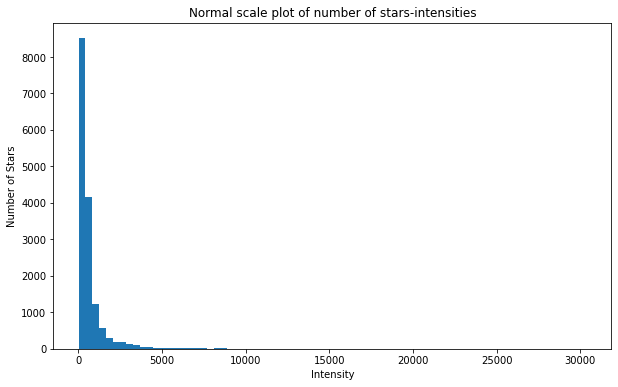

In [11]:
min_num = int(min(intensity_list))
max_num = int(max(intensity_list))
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(intensity_list, bins=75)
#ax.set_title("Log scale plot of number of stars-intensities")
ax.set_title("Normal scale plot of number of stars-intensities")
plt.ylabel("Number of Stars")
plt.xlabel("Intensity")
# plt.gca().set_xscale("log")
# plt.gca().set_yscale("log")
print(f'Number of Stars in the whole image: {len(intensity_list)}')
plt.show()

## Observations
As one can see, the graph looks like a bell curve, which is skewed to the left. Now, time for some statistics, such as:
- mean
- median
- standard deviation

In [12]:
mean = np.mean(intensity_list)
print("Mean:", mean)

median = np.median(intensity_list)
print("Median:", median)

stddev = np.std(intensity_list)
print("Standard deviation:", stddev)

Mean: 726.4084791690292
Median: 408.01411056518555
Standard deviation: 1128.8718793379176


## Future Predictions
To predict future values, a *confidence interval* can be obtained. Based on previous experiments, a confidence level of $90 \%$ seems reasonable.

$$\Large CI = \bar{x} \pm z \frac{s}{\sqrt{n}}$$

> Where:
> - $CI$	=	confidence interval
> - $\bar{x}$	=	sample mean
> - $z$	=	confidence level value
> - $s$	=	sample standard deviation
> - $n$	=	sample size

In [13]:
confidence_level = 0.90
margin_of_error = stddev * np.sqrt(1 / len(intensity_list))
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error
print("Confidence interval at {}%: [{:.2f}, {:.2f}]".format(confidence_level*100, lower_bound, upper_bound))

Confidence interval at 90.0%: [717.40, 735.42]


## Comparing to Normal Distribution
One way to check whether the normal distribution is a good fit is to use a goodness-of-fit test, such as the Anderson-Darling test. This test can help you determine whether your data is significantly different from a theoretical distribution.
$$\large \text{AD} = -n - \frac{1}{n} \sum_{i=1}{n} (2i - 1) \left[ \ln(F(X_i )) + \ln(1 - F(X_{n-i+1})) \right]$$

The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. In its basic form, the test assumes that there are no parameters to be estimated in the distribution being tested, in which case the test and its set of critical values is distribution-free. However, the test is most often used in contexts where a family of distributions is being tested, in which case the parameters of that family need to be estimated and account must be taken of this in adjusting either the test-statistic or its critical values.

> source: [Wikipedia](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test)

In [14]:
from scipy.stats import anderson

result = anderson(intensity_list, dist='norm')

print("Test statistic:", result.statistic)
print("Critical values:", result.critical_values)

# 
if result.statistic < result.critical_values[2]:
    print("Data is likely normally distributed (fail to reject H0)")
else:
    print("Data is likely not normally distributed (reject H0)")

Test statistic: 2725.4486091581784
Critical values: [0.576 0.656 0.787 0.918 1.092]
Data is likely not normally distributed (reject H0)


## Results of Test
It interprets the test result by comparing the test statistic to the critical values. If the test statistic is smaller than the critical value at the specified significance level (in this case, the 0.1 level), then the null hypothesis that the data is normally distributed cannot be rejected. If the test statistic is larger than the critical value, then the null hypothesis is rejected and the data is likely not normally distributed.

### Comparing Graphs
The first example shows how a random dataset would look compared to a normal distribution. Thereafter, the list of values will be drawn on top of a normal distribution to prove that ND is certainly not a good fit for the data.

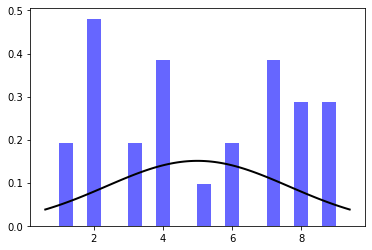

<Figure size 1440x864 with 0 Axes>

In [15]:
# sample data
data = [1, 1, 2,2,2,2,2, 3, 3, 4,4,4,4, 5, 6,6, 7,7,7,7, 8,8,8, 9,9,9]

mu, std = norm.fit(data)

plt.hist(data, bins=20, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.figure(figsize=(20,12))

plt.show()

[85.7147445678711, 46.64628219604492, 129.50488662719727, 46.622798919677734, 40.524375915527344, 39.976009368896484, 78.00834655761719, 137.29179763793945, 270.7657241821289, 268.3421821594238]

mu is: 114.33971481323242, std is: 84.39706191594144

xmin is: 39.976009368896484, xmax is: 270.7657241821289


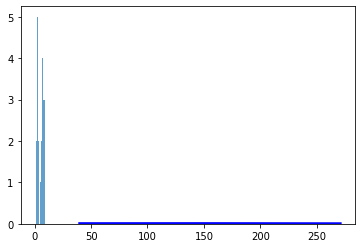

In [16]:
# Copying the first 10 items
# ... for the sake of computation
copy_int = intensity_list[:10]
print(copy_int)

mu, std = norm.fit(copy_int)
print(f"\nmu is: {mu}, std is: {std}")
plt.hist(data, bins=len(copy_int), alpha=0.7)

xmin, xmax = min(copy_int), max(copy_int)
print(f"\nxmin is: {xmin}, xmax is: {xmax}")

x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'b', linewidth=3)
plt.show()

## Conclusion
The data is certainly not normally distributed.